In [1]:
from seahorse import Graph, SContainer
from seahorse import gwrap

import numpy as np
import pandas as pd

### Graph object

Binded with seaborn (sns), pandas (df), mpl (ax) and seahorse (shs) functions

In [2]:
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
df = df.cumsum()

df.head(5)

,A,B,C,D
2000-01-01,-0.763758,0.701162,0.357930,0.200249
2000-01-02,-0.894988,0.642416,2.337191,-1.114305
2000-01-03,-0.636716,1.014188,2.955043,-1.637412
2000-01-04,-1.873861,1.145299,2.565982,-2.051359
2000-01-05,-2.455453,1.567696,2.624147,-2.920396


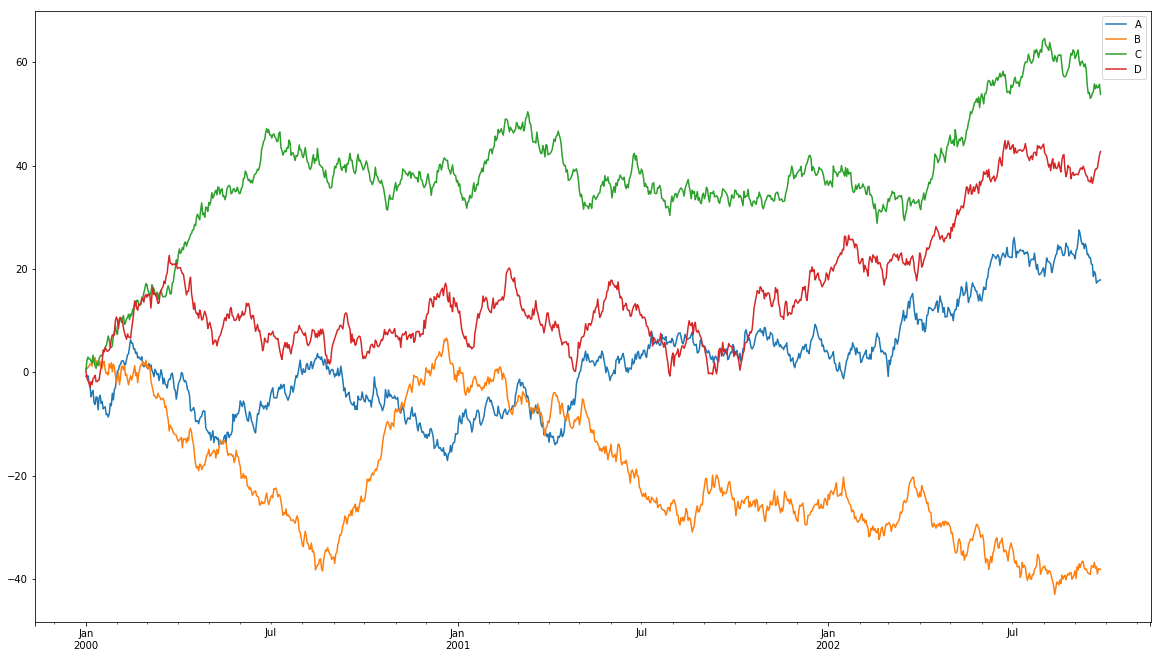

In [3]:
graph = Graph(df)
graph.df.plot()

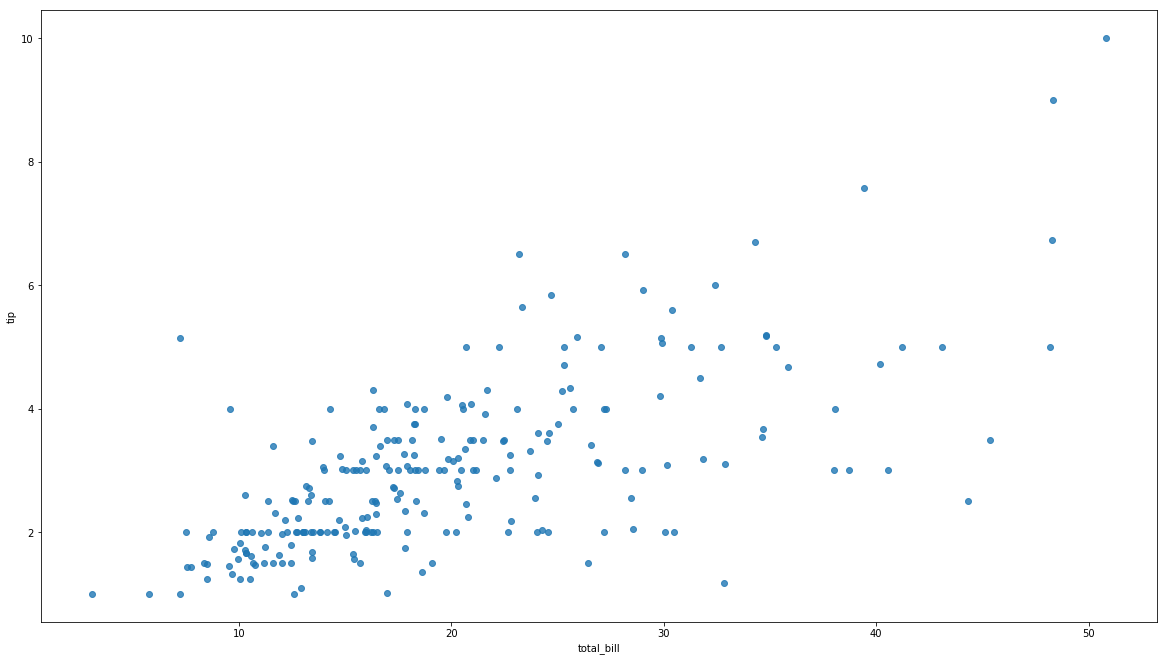

In [4]:
df = gwrap.sns.load_dataset("tips")
graph = Graph(df)
graph.sns.regplot("total_bill", "tip", fit_reg=False)

### SubplotsContainer (SContainer) object

Manage multiple axes within the same figure, using gridspec. ```SContainer``` allows you to both create complexe figure containing various graph types or similar plot with ease.

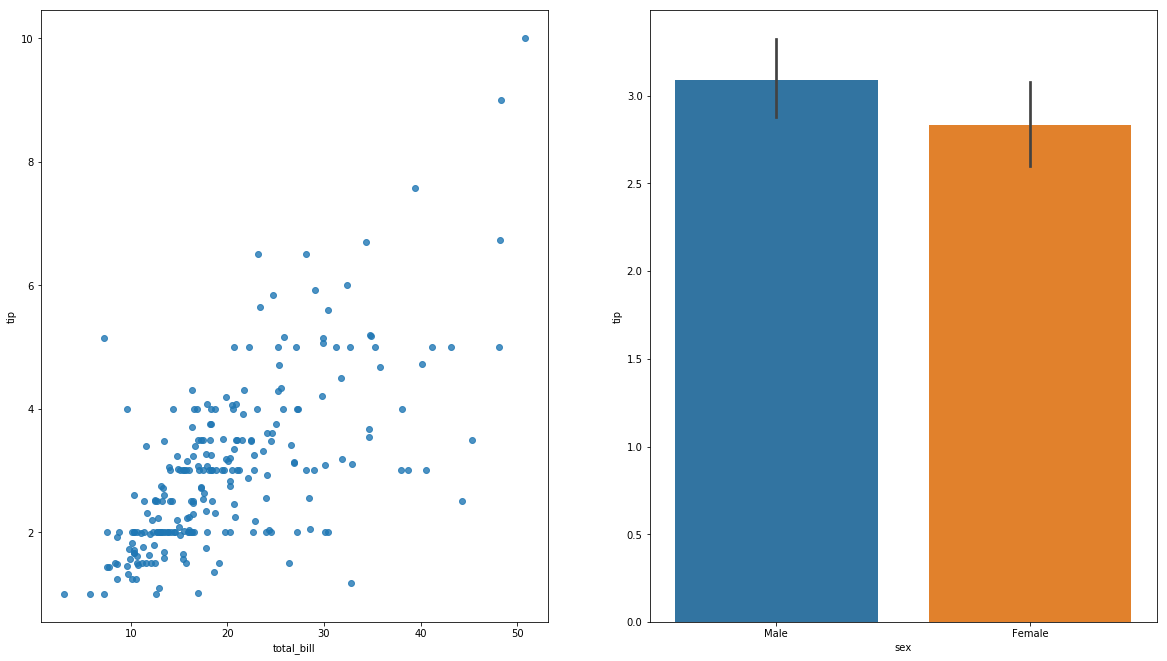

In [5]:
df = gwrap.sns.load_dataset("tips")

sc = SContainer(df, 1, 2)
sc.graph(0).sns.regplot("total_bill", "tip", fit_reg=False)
sc.graph(1).sns.barplot("sex", "tip")

Note that the index used by ```graph``` is the one used by gridspec and a slice can therefore be passed

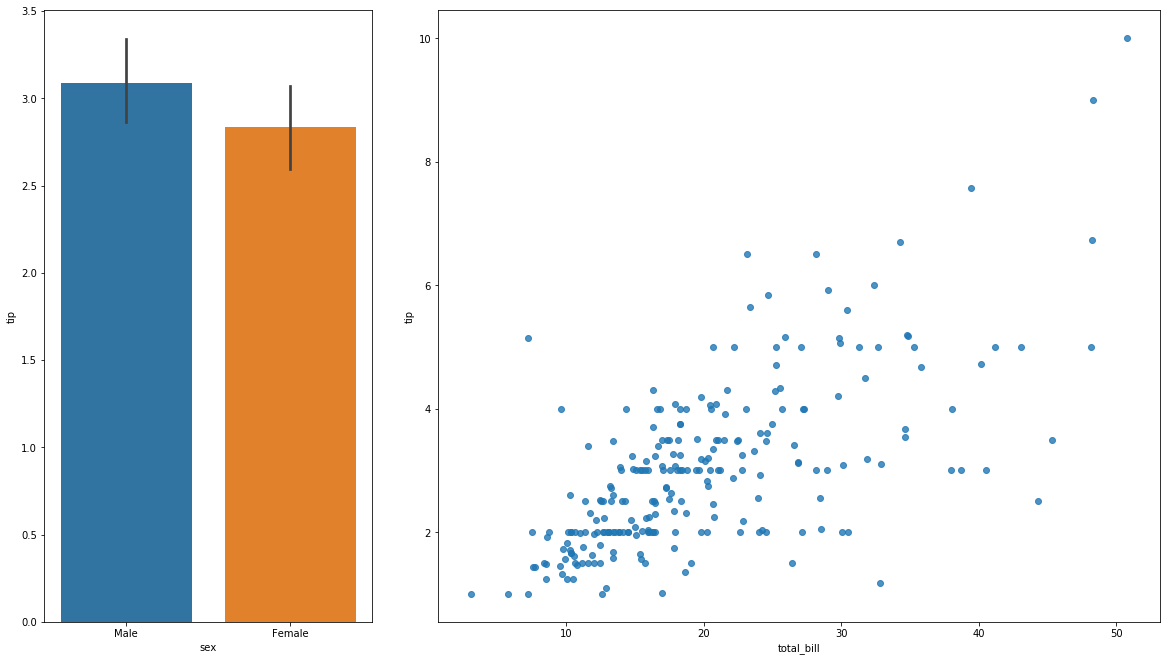

In [6]:
sc = SContainer(df, 1, 3)
sc.graph(0).sns.barplot("sex", "tip")
sc.graph((slice(0), slice(1, 3))).sns.regplot("total_bill", "tip", fit_reg=False)

Several ```GridSpec``` instances can be instancied and linked to the graph. The first one is called ```base``` but the new ones can be accessed easily using ```getitem```

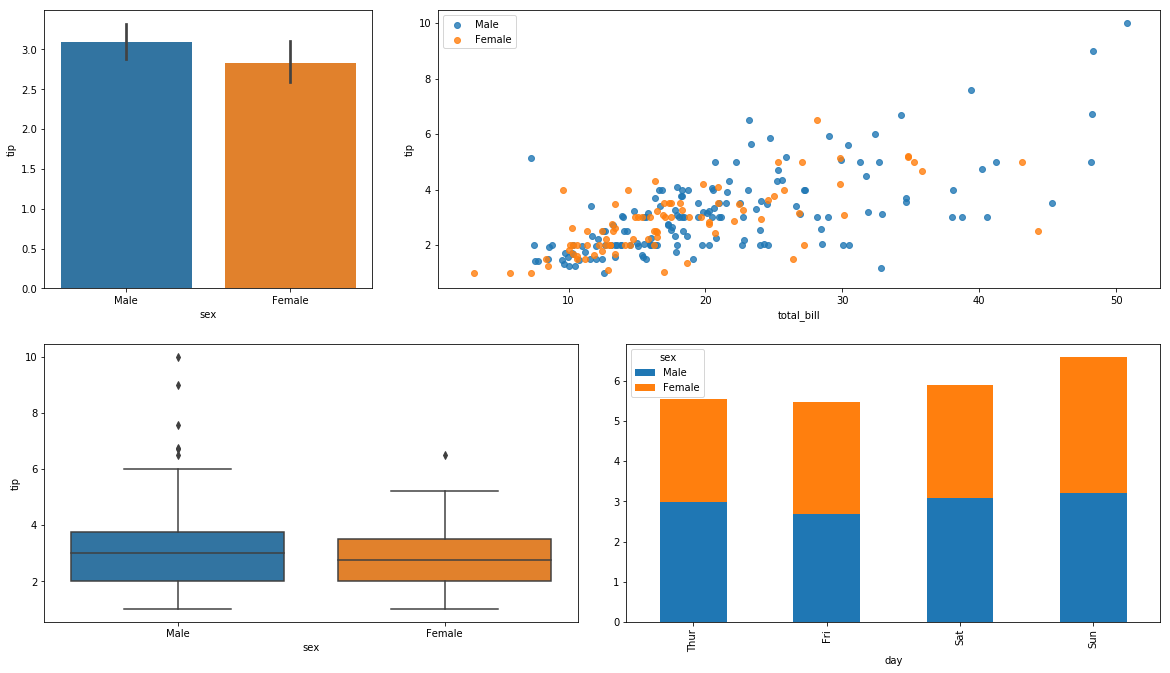

In [7]:
sc = SContainer(df, 2, 3)
sc.add_gs("bottom", 2, 4)

sc.graph((0, 0)).sns.barplot("sex", "tip")
sc.graph((0, slice(1, 3))).shs.colored_regplot("total_bill", "tip", fit_reg=False, hue="sex")

sc["bottom"].graph((1, slice(0, 2))).sns.boxplot("sex", "tip")
sc["bottom"].graph((1, slice(2, 4))).shs.stacked_barplot("day", "tip", "sex")

The ```groupby``` method allows you to quickly create similar graphs

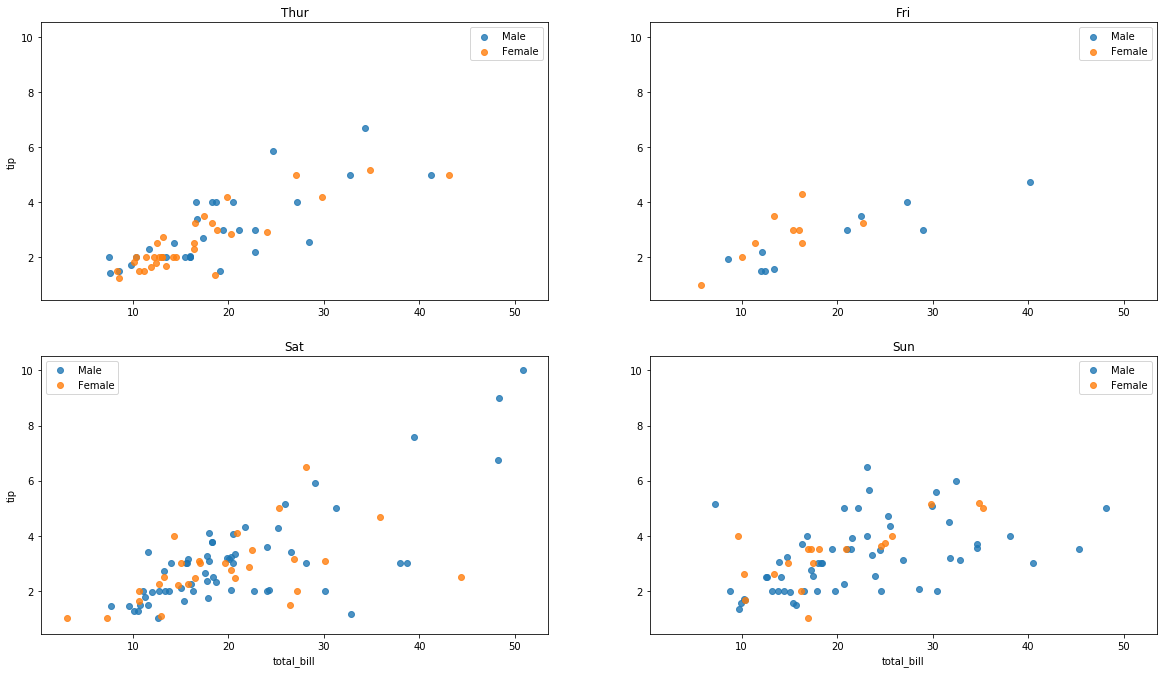

In [8]:
sc = SContainer(df, 2, 2, sharey=True, sharex=True)
sc.groupby("day").shs.colored_regplot("total_bill", "tip", fit_reg=False, hue="sex")